In [31]:
import pandas as pd
import seaborn as sns

In [55]:
summary_file_path = "/home/luisasantus/Desktop/consistency/multiplesequencealign/homfam_refs_benchmark/summary/complete_summary_stats_eval.csv"
# read the summary file
df = pd.read_csv(summary_file_path)
# parse arg_aligners and extract everything that is after -lib 
df["libs"] = df['args_aligner'].str.extract(r'-lib(.*)').squeeze().str.strip()

In [56]:
df.columns

Index(['id', 'seqlength_mean', 'seqlength_median', 'seqlength_max',
       'n_sequences', 'plddt', 'tree', 'args_tree', 'args_tree_clean',
       'aligner', 'args_aligner', 'args_aligner_clean', 'sp', 'tc',
       'EVALUATED', 'APDB', 'iRMSD', 'NiRMSD', 'libs'],
      dtype='object')

/home/luisasantus/mambaforge/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luisasantus/mambaforge/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='proba_pair', ylabel='proba_pair FSfull_pair'>

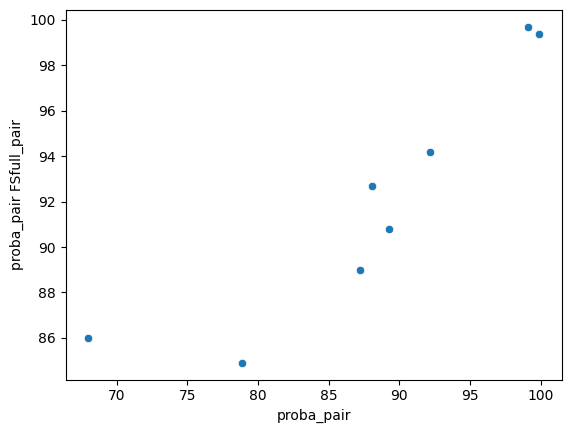

In [59]:
metric = "sp"

# prepare the dataframe to plot scattter sp of lib proba_pair and proba_pair FSfull_pair
#make it 3 columns, id, lib proba_pair, lib proba_pair FSfull_pair, sp
df_plot = df[["id", "libs", metric]]
df_plot = df_plot.drop_duplicates(subset=['id', 'libs'])
df_plot = df_plot.pivot(index='id', columns='libs', values=metric)
df_plot = df_plot.reset_index()

# make it float 


sns.scatterplot(data=df_plot, x="proba_pair", y="proba_pair FSfull_pair")